In [1]:
import pickle
pickle_in1=open('/content/drive/My Drive/result_final.pickle','rb')
result_df=pickle.load(pickle_in1)

In [2]:
target=result_df['is_duplicate']

In [3]:
result_df=result_df.drop(['qid1','qid2','id','question1','question2','is_duplicate'],axis=1)

In [4]:
result_df.columns=[i for i in range(611)]

In [5]:
result_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0,0.652050,-0.007411,0.368659,0.128340,-0.021877,-0.144347,-0.109073,-0.128813,0.918509,0.206629,-0.403346,-0.326536,0.881441,0.063367,0.461110,0.081093,-0.109511,-0.079583,-0.496552,0.388249,-0.164250,-0.022727,-0.490494,0.689847,-0.079577,-0.410254,-0.252018,-0.161227,0.118729,...,0.145174,-0.230218,-0.318824,-0.352275,0.374974,0.709157,0.318796,0.082020,-0.060351,0.064207,-0.264936,-0.345417,0.570937,-0.550523,-0.211237,-0.022953,0.095947,0.775365,0.215512,-0.101135,0.014367,-0.420571,-0.412607,-0.332091,-0.148240,-0.264178,0.025439,-0.115028,-0.122582,-0.491805,0.342661,0.276393,0.261095,-0.548516,-0.385994,0.299061,0.328572,-0.245562,-0.200305,-0.811214
1,4,1,51,88,8,13,4.0,20.0,0.200000,5,3,0.140073,0.000711,0.096472,-0.142754,-0.099417,0.086516,0.168920,0.003971,0.153431,-0.056401,-0.001277,-0.083843,-0.015332,0.108099,0.023467,-0.095751,0.114817,-0.142175,-0.047699,-0.062746,0.065755,-0.039063,-0.056954,0.150260,0.037455,0.047439,-0.205610,0.036787,0.078867,...,0.074593,-0.159453,0.060325,-0.091335,-0.112765,-0.112982,0.289756,0.017961,-0.205286,-0.063638,-0.183715,0.003083,0.238973,0.132149,0.028781,-0.180929,-0.027628,0.236344,-0.130349,-0.249978,-0.074989,-0.007919,-0.004735,-0.164227,0.180466,0.172485,0.123980,0.003302,-0.146643,-0.149539,0.118619,-0.094859,-0.099190,-0.045203,0.051872,-0.005270,0.019713,-0.020430,-0.261246,0.108116
2,1,1,73,59,14,10,4.0,24.0,0.166667,2,0,0.107923,0.097709,-0.110357,-0.100013,0.131149,-0.028987,-0.046179,-0.575256,0.344310,0.383107,0.215445,-0.270850,0.153574,0.468341,0.425940,-0.159376,-0.201853,0.126707,-0.232689,-0.045128,-0.324636,-0.001896,0.027186,-0.075462,-0.054842,-0.222964,0.287300,-0.651920,0.361039,...,-0.178505,0.012653,0.491002,-0.699050,0.103845,0.077599,0.269581,0.279610,0.359920,0.359875,0.280840,-0.060005,0.289988,0.021471,-0.278885,0.019066,-0.105869,0.099281,0.248634,0.107635,-0.004039,-0.276679,0.202962,0.262959,-0.571238,-0.253427,0.577036,0.240308,-0.178557,-0.122102,-0.118587,0.178655,0.310524,-0.464961,0.343405,0.245518,-0.017217,-0.083107,-0.009376,0.146878
3,1,1,50,65,11,9,0.0,19.0,0.000000,2,0,-0.244065,-0.458080,-0.207716,0.213755,0.127259,0.295239,0.395320,-0.026622,-0.347147,0.034050,0.002208,0.292792,-0.508096,0.265508,0.083389,-0.372382,-0.138083,-0.229227,0.523384,0.474298,0.101929,0.669974,-0.284709,-0.369127,-0.012502,-0.352115,0.048989,0.260682,-0.214782,...,-0.399001,-0.316884,0.181219,-0.341970,0.023897,0.307849,-0.201257,-0.032332,-0.262707,0.599363,0.161604,-0.831831,0.746624,0.302189,0.041213,-0.047797,0.060472,0.183616,0.479311,-0.528845,0.447906,0.119598,-0.543680,-0.409787,-0.393257,-0.140505,0.842973,0.142701,-0.448024,-0.212281,-0.561801,0.596229,0.167306,0.532779,-0.439017,0.332205,0.416707,-0.727601,0.112693,0.144836
4,3,1,76,39,13,7,2.0,20.0,0.100000,4,2,-0.104445,-0.322765,-0.111550,-0.246774,0.318736,0.091286,0.219302,0.013464,-0.235196,0.145599,0.055952,0.045674,-0.041449,0.214960,-0.142030,0.007883,-0.221602,0.218066,-0.159529,-0.089990,0.143648,-0.418952,0.036770,-0.502122,-0.216888,0.022798,-0.001642,-0.146039,-0.355146,...,-0.463868,-0.359020,0.187731,-0.494069,-0.300788,-0.243563,0.186488,-0.263296,-0.147515,-0.199162,0.349257,1.013203,-0.311440,0.080047,0.215527,-0.083295,-0.014849,-0.009682,-0.598281,-0.050061,-0.412607,0.375295,0.390768,0.399411,0.186418,-0.090030,-0.160880,-0.245847,-0.351131,0.104911,-0.424571,0.000649,-0.025774,0.436215,-0.256783,-0.376610,-0.463283,0.184541,-0.076573,0.620030


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [7]:
X_train,X_test, y_train, y_test = train_test_split(result_df, target, stratify=target, test_size=0.3)

In [8]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (283003, 611)
Number of data points in test data : (121287, 611)


In [9]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in test data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6308025003268517 Class 1:  0.36919749967314835
---------- Distribution of output variable in test data ----------
Class 0:  0.3691986775169639 Class 1:  0.3691986775169639


In [10]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

XGBOOST

The train log loss is: 0.3745458289522987
The test log loss is: 0.3787353339265341
Total number of data points : 121287


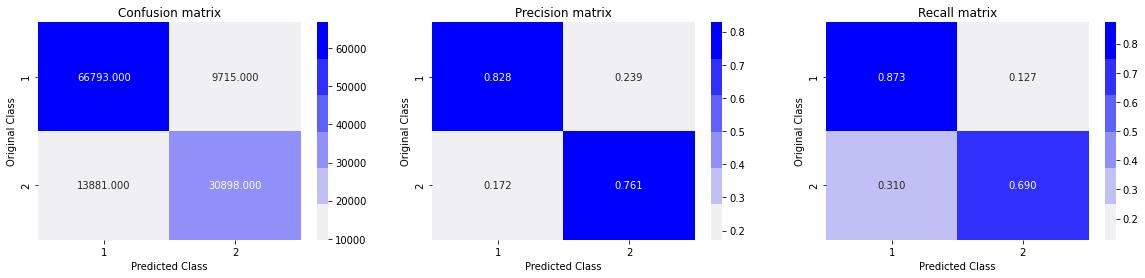

In [13]:
import xgboost as xgb
xGBClassifier =xgb.XGBClassifier( 
                              learning_rate=0.3, 
                              n_estimators=80
                              )
xGBClassifier.fit(X_train, y_train)

predict_y = xGBClassifier.predict_proba(X_train)
print( "The train log loss is:",log_loss(y_train, predict_y, eps=1e-15))
predict_y = xGBClassifier.predict_proba(X_test)
print( "The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [16]:
 from prettytable import PrettyTable
ptable = PrettyTable()
ptable.title = " Model Comparision "
ptable.field_names = ['Dataset Size', 'Model Name', 'Tokenizer','Hyperparameter Tunning', 'Train log loss ','Test Log Loss']
ptable.add_row(["~ 400K","Logistic Regression","TFIDF Weighted Word2Vec","Done","0.431","0.436"])
ptable.add_row(["~ 400K","Linear SVM","TFIDF Weighted Word2Vec","Done","0.447","0.451"])
ptable.add_row(["~ 400K","xgboost","TFIDF Weighted Word2Vec","Done","0.374","0.378"])
print(ptable)

+-------------------------------------------------------------------------------------------------------------------------+
|                                                    Model Comparision                                                    |
+--------------+---------------------+-------------------------+------------------------+-----------------+---------------+
| Dataset Size |      Model Name     |        Tokenizer        | Hyperparameter Tunning | Train log loss  | Test Log Loss |
+--------------+---------------------+-------------------------+------------------------+-----------------+---------------+
|    ~ 400K    | Logistic Regression | TFIDF Weighted Word2Vec |          Done          |      0.431      |     0.436     |
|    ~ 400K    |      Linear SVM     | TFIDF Weighted Word2Vec |          Done          |      0.447      |     0.451     |
|    ~ 400K    |       xgboost       | TFIDF Weighted Word2Vec |          Done          |      0.374      |     0.378     |
+-------